# Quantum teleportation

For this Qiskit in Classrooms module, students must have a working Python environment with the following packages installed:

*   `qiskit` v2.1.0 or newer
*   `qiskit-ibm-runtime` v0.40.1 or newer
*   `qiskit-aer` v0.17.0 or newer
*   `qiskit.visualization`
*   `numpy`
*   `pylatexenc`

To set up and install the packages above, see the [Install Qiskit](/docs/guides/install-qiskit) guide.
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum® by following the steps in the [Set up your IBM Cloud account](/docs/guides/cloud-setup) guide.

This module was tested and used 14 seconds of QPU time. This is an estimate only. Your actual usage may vary.



In [1]:
# Uncomment and modify this line as needed to install dependencies
# !pip install 'qiskit>=2.1.0' 'qiskit-ibm-runtime>=0.40.1' 'qiskit-aer>=0.17.0' 'numpy' 'pylatexenc' 'matplotlib'

Watch the module walkthrough by Dr. Katie McCormick below, or click [here](https://youtu.be/jxqnzltpDdE?si=UVL58hFOOWe2Q9qI) to watch it on YouTube.

***

<IBMVideo id="134413680" title="Katie McCormick demystifies quantum teleportation, and walks us through some examples using Qiskit." />



## Portas lógicas

**H Hadamard Gate:** Porta de um qubit que cria uma superposição de estados.

$$
H|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right),
$$

$$
H|1\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)
$$

$$
H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$

Em qiskit:



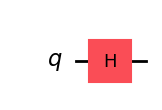

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

**CNOT Controlled-NOT Gate:** Porta de dois qubits: um controle e um alvo. Se o qubit de controle está no estado $|1\rangle$, ela altera o estado do qubit alvo. 

$$
CNOT(A,B)|00\rangle = |00\rangle, \\ CNOT(A,B)|01\rangle = |11\rangle, \\ CNOT(A,B)|10\rangle = |10\rangle, \\ CNOT(A,B)|11\rangle = |01\rangle
$$

$$
CNOT=\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}
$$

Em qiskit:


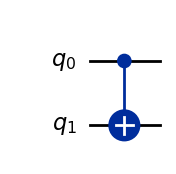

In [3]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

**$X$ Gate**: Porta de um qubit equivalente a uma operação NOT.

$$
X|0\rangle = |1\rangle,\\X|1\rangle=|0\rangle
$$

$$
X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

Em qiskit:

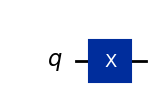

In [4]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

**$Z$ Gate**: Porta de um qubit. Adiciona uma fase ao estado $|1\rangle$: 

$$
Z|0\rangle = |0\rangle,\\Z|1\rangle=-|1\rangle
$$

$$
Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

Em Qiskit:

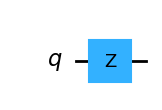

In [5]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw("mpl")

| Alice outcome                        | Bob's state                                          | Instruction to Bob | Result                                              |
| ------------------------------------ | ---------------------------------------------------- | ------------------ | --------------------------------------------------- |
| $ \vert 0\rangle_A \vert 0\rangle_Q$ | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$  | None               | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 0\rangle_A \vert 1\rangle_Q$ | $\alpha_0\vert 0\rangle_B-\alpha_1\vert 1\rangle_B$  | $Z$                | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 1\rangle_A \vert 0\rangle_Q$ | $\alpha_1\vert 0\rangle_B+\alpha_0\vert 1\rangle_B$  | $X$                | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |
| $ \vert 1\rangle_A \vert 1\rangle_Q$ | $-\alpha_1\vert 0\rangle_B+\alpha_0\vert 1\rangle_B$ | $X$ then $Z$       | $\alpha_0\vert 0\rangle_B+\alpha_1\vert 1\rangle_B$ |



## Experimento

### O circuito

Vamos criar um circuito com 3 qubits e emaranhar os dois qubits de A e B. Vamos chamar esses dois qubits de 1 e 2 e reservar o qubit 0 para o estado a ser teleportado.

A "Sampler" is a primitive designed to sample possible states resulting from a quantum circuit, and collect statistics on what states might be measured and with what probability. We import the Qiskit Runtime Sampler here:



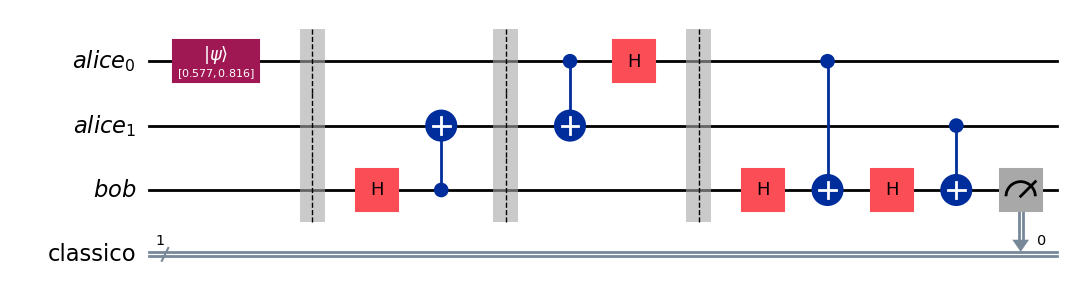

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

# --- Registrando os Qubits ---
Alice = QuantumRegister(2, 'alice')
Bob = QuantumRegister(1, 'bob')
b = ClassicalRegister(1, 'classico')

# --- Criando o circuito ---
teleporte = QuantumCircuit(Alice, Bob, b)

# --- Inicializando o estado a ser teletransportado ---
estado_inicial = [np.sqrt(1/3), np.sqrt(2/3)]
teleporte.initialize(estado_inicial, Alice[0])

teleporte.barrier()

# --- Preparando o entrelaçamento entre Alice[1] e Bob[0] ---
teleporte.h(Bob[0])
teleporte.cx(Bob[0], Alice[1])
teleporte.barrier()

# --- Operações de Alice para teletransporte ---
teleporte.cx(Alice[0], Alice[1])
teleporte.h(Alice[0])
teleporte.barrier()


# teleporte.measure(Alice[1], b[1])
# teleporte.measure(Alice[0], b[0])

# Agora aplicamos uma lógica condicional baseada na tabela acima.
#with teleporte.if_test((b[1], 1)):
#    teleporte.x(Bob)
#with teleporte.if_test((b[0], 1)):
#    teleporte.z(Bob)

teleporte.draw(output="mpl")

# --- Operações de Bob para reconstruir o estado ---
teleporte.h(Bob[0])
teleporte.cx(Alice[0], Bob[0])
teleporte.h(Bob[0])
teleporte.cx(Alice[1], Bob[0])
teleporte.measure(Bob, b)


teleporte.draw(output = 'mpl')


{'0': 2656, '1': 5344}


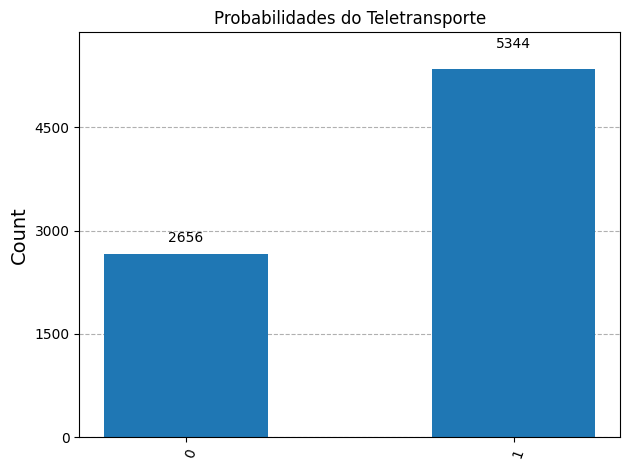

In [7]:
# --- Inicializa o simulador ---
backend = AerSimulator()

# --- Executa o circuito ---
job = backend.run(teleporte, shots=8000)
resultado = job.result()

# --- Pega os resultados ---

counts = resultado.get_counts()
print(counts)

# --- Plota o histograma ---
plot_histogram(counts, title='Probabilidades do Teletransporte')
